In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
y_train = np.array(train_df.pop('Class'))
y_test = np.array(test_df.pop('Class'))

train = train_df
scalers={}
from sklearn.preprocessing import MinMaxScaler
import numpy as np
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
scalers={}
from sklearn.preprocessing import MinMaxScaler
import numpy as np
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    test[i]=s_s

x_train = np.array(train)
x_test = np.array(test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
np.expand_dims(x_train, axis = 0)
# E1D1
# n_features ==> no of features at each timestep in the data.
#
model = tf.keras.Sequential()
model.add(tf.keras.Input())
model = tf.keras.Sequential([
tf.keras.layers.LSTM(3, input_shape=(10, 210),return_sequences=True),
# keras.layers.Dropout(0.5),
tf.keras.layers.Dense(3, input_shape=(),activation='sigmoid')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
            metrics=[
    keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
    ])
#
model.summary()
history = model.fit(x_train,y_train,epochs=100, validation_data=(x_test,y_test))


In [ ]:
## Create Dataset

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
n=1000
zero_train = tf.random.normal([n,2],mean=0)
two_train = tf.random.normal([n,2],mean=10)
y_zero = np.zeros(n)
y_two = np.ones(n)
x_train = np.array(tf.concat([zero_train,two_train],0))
y_train = np.concatenate((y_zero,y_two))

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=0)
import seaborn as sns

x_train = pd.DataFrame(x_train,columns=['x','y'])
y_train = pd.DataFrame(y_train,columns=['class'])
df = pd.concat([x_train,y_train],axis=1)
sns.displot(df,x='x',y='y',hue='class')

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('y'))
val_labels = np.array(val_df.pop('y'))
test_labels = np.array(test_df.pop('y'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [ ]:
## Create Time Series Data
def split_sequence(sequence,labels,n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x= sequence[i:end_ix]
		X.append(seq_x)
		y.append(labels[i])
	return np.array(X), np.array(y)
n = 10000
p = 50
# sin_data = np.sin(np.linspace(0,p*np.pi,n))
sin_data = np.zeros(n)
cos_data = np.cos(np.linspace(0,p*np.pi,n))
sin_y = np.zeros(n)
cos_y = np.ones(n)
## Visualize
plt.plot(sin_data)
plt.plot(cos_data)
print(str(n/p)+" data points per period")

x = pd.DataFrame(np.concatenate((sin_data,cos_data)),columns=['x'])
y = pd.DataFrame(np.concatenate((sin_y,cos_y)),columns=['y'])
df = pd.concat([x,y],axis=1)
# choose a number of time steps
n_steps = 200
# split into samples
X, y = split_sequence(np.array(df['x']),np.array(df['y']), n_steps)

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

# # reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

In [ ]:
# LSTM to Predict Class
from tensorflow import keras
# define model
model = keras.Sequential()
model.add(keras.layers.LSTM(10, activation='relu', input_shape=(n_steps, n_features)))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(X, y, epochs=100, batch_size=1,validation_split=0.1)

In [ ]:
## CNN Data
n = 10000
p = 50
# sin_data = np.sin(np.linspace(0,p*np.pi,n))
sin_data = np.zeros(n)

sin_y = np.zeros(n)
cos_y = np.ones(n)
## Visualize
plt.plot(sin_data)
plt.plot(cos_data)
from sklearn.utils import shuffle

x = pd.DataFrame(np.concatenate((sin_data,cos_data)),columns=['x'])
y = pd.DataFrame(np.concatenate((sin_y,cos_y)),columns=['y'])

X, y = shuffle(x, y, random_state=0)
print(str(n/p)+" data points per period")
kernel_size = 100
## CNN
# n_timesteps, n_features, n_outputs = X.shape[1], X.shape[2], y.shape[1]s
from tensorflow.keras import Sequential, Conv1D, Dropout, MaxPooling1D, Flatten, Dense
tensorflow.keras
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10000,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=100, batch_size=1,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [ ]:
from tensorflow import keras
model = tf.keras.Sequential([
keras.layers.Dense(200, activation='relu',input_shape=(train_features.shape[-1],)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[20.]
 [20.]
 [20.]] 2
[[1.]
 [1.]
 [1.]] 1
[[20.]
 [20.]
 [20.]] 2
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[1.]
 [1.]
 [1.]] 1
[[20.]
 [20.]
 [20.]] 2
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[0.]
 [0.]
 [0.]] 0
[[0.]
 [0.]
 [0.]] 0
[[20.]
 [20.]
 [20.]] 2
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[1.]
 [1.]
 [1.]] 1
[[1.]
 [1.]
 [1.]] 1
[[0.]
 [0.]
 [0.]] 0
[[1.]
 [1.]
 [1.]] 1
[[1.]
 [1.]
 [1.]] 1
[[0.]
 [0.]
 [0.]] 0
[[20.]
 [20.]
 [20.]] 2
[[20.]
 [20.]
 [20.]] 2
[[20.]
 [20.]
 [20.]] 2
[[1.]
 [1.]
 [1.]] 1
[[20.]
 [20.]
 [20.]] 2
[[1.]
 [1.]
 [1.]] 1
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[0.]
 [0.]
 [0.]] 0
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[0.]
 [0.]
 [0.]] 0
[[1.]
 [1.]
 [1.]] 1
[[0.]
 [0.]
 [0.]] 0
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[1.]
 [1.]
 [1.]] 1
[[1.]
 [1.]
 [1.]] 1
[[1.]
 [1.]
 [1.]] 1
[[20.]
 [20.]
 [20.]] 2
[[0.]
 [0.]
 [0.]] 0
[[1.

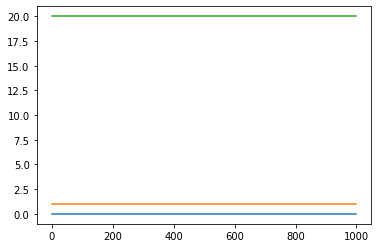

In [70]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
n = 1000
# x = np.array(tf.random.normal([n,1],mean=0))
# y = np.array(tf.random.normal([n,1],mean=5))
# z = np.array(tf.random.normal([n,1],mean=20))
x = np.zeros((n,1))
y = np.ones((n,1))
z = np.ones((n,1))*20

plt.plot(x)
plt.plot(y)
plt.plot(z)

x_win = []
y_win = []
z_win = []
# Window
X = []
labels = []
window_size = 3
for i in range(n-window_size):
    X.append(x[i:i+window_size])
    labels.append(0)
    X.append(y[i:i+window_size])
    labels.append(1)
    X.append(z[i:i+window_size])
    labels.append(2)
X = np.array(X)
# X = np.concatenate((x_win,y_win,z_win))

from tensorflow import keras
model = tf.keras.Sequential([
keras.layers.Dense(500, activation='relu',input_shape=(3,1)),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
            metrics=[
    keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
    ])
np.array(labels)
# model.fit(X,tf.one_hot(labels,depth=3),verbose=1,epochs=100)

for i in range(100):
    print(X[i],labels[i])
print(X.shape)

In [126]:
## Generate Three Classes of Data
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

n = 100000
x = np.array(tf.random.normal([n,1],mean=0))
# y = np.array(tf.random.normal([n,1],mean=5))
y = np.cos(np.linspace(0,20*np.pi,n))
y = np.reshape(y,(y.shape[0],1))
z = np.array(tf.random.normal([n,1],mean=20))
x_ = np.zeros((n,1))
y_ = np.ones((n,1))
z_ = np.ones((n,1))*20
X = np.concatenate((x,y,z))
Y = np.concatenate((x_,y_,z_))
X, Y = shuffle(X, Y,random_state=0)
X = pd.DataFrame(X,columns=['x'])
Y = pd.DataFrame(Y,columns=['y'])

print(X.shape[-1])
model = tf.keras.Sequential([
keras.layers.Dense(3, activation='relu',input_shape=(X.shape[-1],)),
keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics=[
keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
keras.metrics.Precision(name='precision'),
keras.metrics.Recall(name='recall'),
keras.metrics.AUC(name='auc')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='categorical_accuracy', 
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True)

baseline_history = model.fit(
X,
Y,
batch_size=200,
epochs=100,
# validation_data=(val_features, tf.one_hot(val_labels,depth=3)),
callbacks=[early_stopping])
# train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
# test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
# baseline_results = model.evaluate(test_features, tf.one_hot(test_labels,depth=3),
#                                 batch_size=BATCH_SIZE, verbose=0)
# print(baseline_results[1])
# plot_cm(tf.one_hot(test_labels,depth=3).numpy().argmax(axis=1),test_predictions_baseline.argmax(axis=1),baseline_results,hln,"all")
# date = strftime('%X %x').replace("/","").split()
# plt.savefig("figures/"+str(date[1])+"@"+str(date[0][:5].replace(":",""))+"_"+str(hln)+"neurons_confusion_matrix.png",bbox_inches='tight')

1
Epoch 1/100
1500/1500 [==============================] - 2s 883us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.6530 - recall: 0.9169 - auc: 0.5637
Epoch 2/100
1500/1500 [==============================] - 1s 879us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.6667 - recall: 1.0000 - auc: 0.5526
Epoch 3/100
1500/1500 [==============================] - 1s 822us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.6667 - recall: 1.0000 - auc: 0.5416
Epoch 4/100
1500/1500 [==============================] - 1s 837us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.6667 - recall: 1.0000 - auc: 0.5235
Epoch 5/100
1500/1500 [==============================] - 1s 816us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.6667 - recall: 1.0000 - auc: 0.5000
Epoch 6/100
1500/1500 [==============================] - 1s 824us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 0.66

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")
test_df = pd.read_csv("test.csv")

y_test = test_df.pop('Class')
x_test = test_df
y_train = train_df.pop('Class')
x_train = train_df
y_val = val_df.pop('Class')
x_val = val_df

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
model = tf.keras.Sequential([
keras.layers.Dense(200, activation='relu',input_shape=(x_train.shape[-1],)),
keras.layers.Dropout(0.5),
tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
        metrics=[
keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
keras.metrics.Precision(name='precision'),
keras.metrics.Recall(name='recall'),
keras.metrics.AUC(name='auc')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='categorical_accuracy', 
    verbose=1,
    patience=100,
    mode='max',
    restore_best_weights=True)

baseline_history = model.fit(
x_train,
tf.one_hot(y_train,3),
batch_size=200,
epochs=10,
validation_data=(x_val, tf.one_hot(y_val,depth=3)),
callbacks=[early_stopping])

Epoch 1/10
718/718 [==============================] - 5s 5ms/step - loss: 0.4426 - categorical_accuracy: 0.8471 - precision: 0.5753 - recall: 0.9607 - auc: 0.9338 - val_loss: 0.3541 - val_categorical_accuracy: 0.8820 - val_precision: 0.6844 - val_recall: 0.9491 - val_auc: 0.9557
Epoch 2/10
718/718 [==============================] - 3s 4ms/step - loss: 0.3146 - categorical_accuracy: 0.8926 - precision: 0.6883 - recall: 0.9559 - auc: 0.9626 - val_loss: 0.3201 - val_categorical_accuracy: 0.8911 - val_precision: 0.7273 - val_recall: 0.9519 - val_auc: 0.9643
Epoch 3/10
718/718 [==============================] - 3s 4ms/step - loss: 0.2937 - categorical_accuracy: 0.8992 - precision: 0.7255 - recall: 0.9551 - auc: 0.9675 - val_loss: 0.3373 - val_categorical_accuracy: 0.8832 - val_precision: 0.7325 - val_recall: 0.9475 - val_auc: 0.9618
Epoch 4/10
718/718 [==============================] - 3s 4ms/step - loss: 0.2829 - categorical_accuracy: 0.9029 - precision: 0.7402 - recall: 0.9557 - auc: 0.96

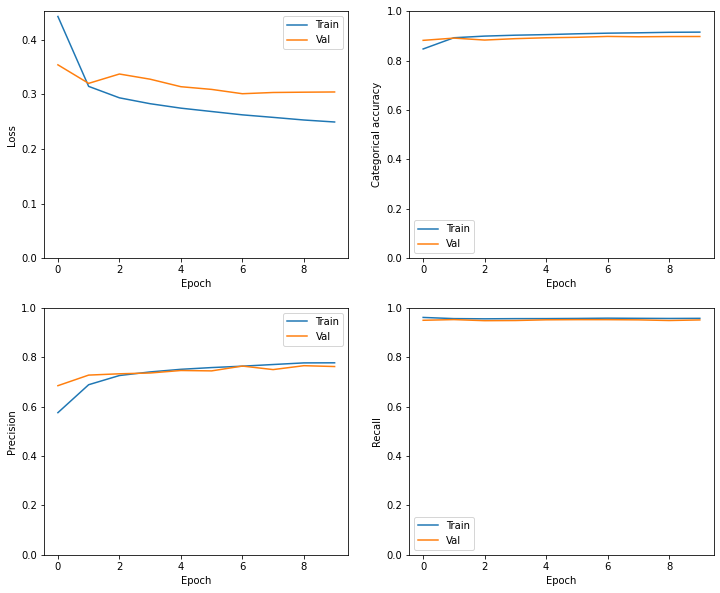

In [6]:
from scripts.utils import *
plot_metrics(baseline_history,"",10)

0.9127032160758972


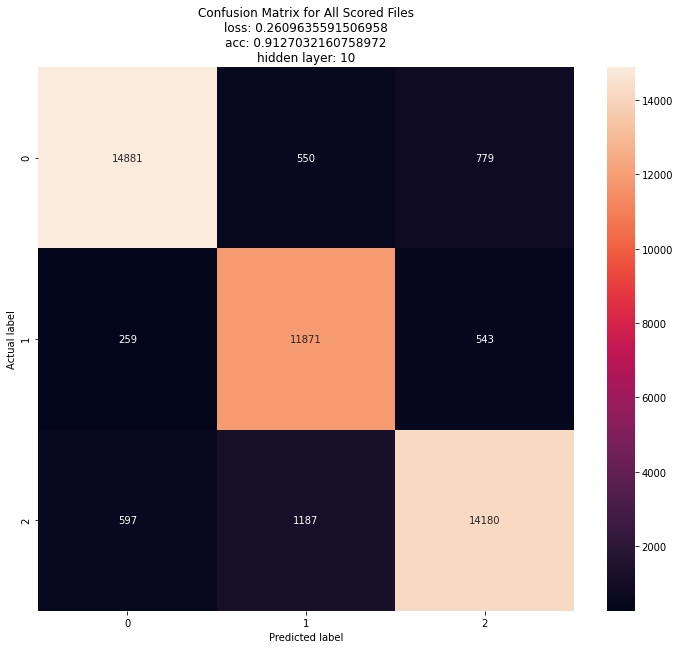

In [15]:
BATCH_SIZE=200
hln = 10
train_predictions_baseline = model.predict(x_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(x_test, batch_size=BATCH_SIZE)
baseline_results = model.evaluate(x_test, tf.one_hot(y_test,depth=3),
                                    batch_size=BATCH_SIZE, verbose=0)
print(baseline_results[1])
plot_cm(tf.one_hot(y_test,depth=3).numpy().argmax(axis=1),test_predictions_baseline.argmax(axis=1),baseline_results,hln,"All Scored Files")
date = strftime('%X %x').replace("/","").split()
plt.savefig("figures/"+str(date[1])+"@"+str(date[0][:5].replace(":",""))+"_"+str(hln)+"neurons_confusion_matrix.png",bbox_inches='tight')